In [3]:
import pandas as pd
import numpy as np 
import seaborn as sn

In [4]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df1=df.drop('customerID',axis=1)

<Axes: xlabel='tenure', ylabel='Count'>

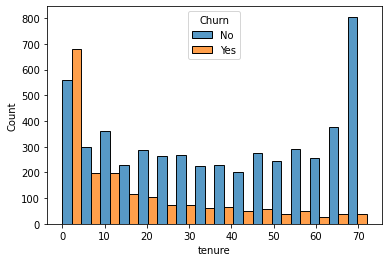

In [8]:
sn.histplot(x=df.tenure,hue=df.Churn,multiple='dodge')

DATA CLEANING

In [9]:
def getnames(dataframe):
  for c in dataframe:
    print(c,':',dataframe[c].unique())

In [10]:
getnames(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

DROPING THE UNWANTED ATTRIBUTE AND CONVERTING THE OBJECT DATATYPE INTO INTEGERS

In [11]:
df1=df.drop('customerID',axis=1)

In [12]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


In [13]:
getnames(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [14]:
df1.replace({'No':0,"Yes":1},inplace=True)
df1.replace({'Male':1,"Female":0},inplace=True)
df1['InternetService'].replace(0,'No',inplace=True)
getnames(df1)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


CREATING DUMMY VARIABLES 

In [15]:
dum=['InternetService','Contract','PaymentMethod']
df2=pd.get_dummies(data=df1,columns=dum)

In [16]:
getnames(df2)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [17]:
df2.shape

(7043, 27)

In [18]:
pd.to_numeric(df2['TotalCharges'],errors='coerce').isnull().sum()

11

Converting the object dtype into integers and removing some rows of the invalid dtype

In [19]:
df2[pd.to_numeric(df2['TotalCharges'],errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
753,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
936,0,0,1,1,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
1082,1,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1340,0,0,1,1,0,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3331,1,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3826,1,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4380,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5218,1,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6670,0,0,1,1,0,1,1,0,1,1,...,1,0,0,0,0,1,0,0,0,1


In [20]:
df2.TotalCharges[488]

' '

In [21]:
df2=df2[df2['TotalCharges']!=' ']
df2.shape

(7032, 27)

Scaling the records of the dataframe 

In [22]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
d=['tenure','MonthlyCharges','TotalCharges']
df2[d]=m.fit_transform(df2[d])

In [23]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

In [25]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Since the target variables are imbalanced we need to balance the datasets by under sampling,over sampling and SMOTE method

Creating model and train_test functions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [38]:
def log(x1,x2,y1,y2):
  m=LogisticRegression()
  m.fit(x1,y1)
  print(classification_report(y2,m.predict(x2)))

In [31]:
def train(x,y):
  x1,x2,y1,y2=train_test_split(x,y,stratify=y)
  return x1,x2,y1,y2

Normal Sampling

In [44]:
x1,x2,y1,y2=train(x,y)
y1.value_counts()

0    3872
1    1402
Name: Churn, dtype: int64

In [45]:
log(x1,x2,y1,y2)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.55      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



The accuracy level is poor and the datasets are not fair enough

## **Uunder Sampling**

In [28]:
dfc0=df2[df2.Churn==0]
dfc1=df2[df2.Churn==1]
d0,d1=y.value_counts()
d0,d1

(5163, 1869)

In [32]:
dfc0_under=dfc0.sample(d1)
df3=pd.concat([dfc0_under,dfc1],axis=0)

In [34]:
x1,x2,y1,y2=train(df3.drop('Churn',axis=1),df3.Churn)

In [43]:
y1.value_counts()

0    1402
1    1401
Name: Churn, dtype: int64

In [39]:
log(x1,x2,y1,y2)

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       467
           1       0.73      0.78      0.75       468

    accuracy                           0.75       935
   macro avg       0.75      0.75      0.75       935
weighted avg       0.75      0.75      0.75       935



The accuracy level is improved

## **Over Sampling**

In [50]:
dfc1_over=dfc1.sample(d0,replace=True)

In [51]:
dfc1_over.shape

(5163, 27)

In [52]:
df4=pd.concat([dfc1_over,dfc0],axis=0)

In [58]:
x1,x2,y1,y2=train(df4.drop('Churn',axis=1),df4.Churn)
y1.value_counts()

1    3872
0    3872
Name: Churn, dtype: int64

In [54]:
log(x1,x2,y1,y2)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1291
           1       0.76      0.81      0.78      1291

    accuracy                           0.77      2582
   macro avg       0.78      0.77      0.77      2582
weighted avg       0.78      0.77      0.77      2582



The accuracy level is increased

## **using SMOTE**

In [64]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [70]:
x1,x2,y1,y2=train(X_sm,y_sm)
y1.value_counts()

1    3872
0    3872
Name: Churn, dtype: int64

In [72]:
log(x1,x2,y1,y2)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1291
           1       0.77      0.82      0.79      1291

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE METHOD GIVES THE BEST ACCURACY